# Title

general intro (short)

## Exploratory data analysis

1-2 paragraph intro explaining approach and 3 main questions.

In [82]:
# Import needed packages and read in the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Question 1. Where are there missing or duplicate values?

In [2]:
# View .info() to see where there are missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Right off the bat, I can see that I'll need to change the `date` column to datetime and `sqft_basement` to a numeric data type.  There are NaNs to be resolved in the `waterfront`, `view`, and `yr_renovated` columns. I'm betting that `waterfront`, `view`, `condition`, and `grade` are categorical variables, and once that is confirmed, they will need to have dummies made and one column from each dropped. `zipcode` may also be better used as a categorical variable. 

To check for duplicate records, I will first see if there are any exact duplicates. Then I'll check for duplicates in the `id` column, since that seems like it should be a unique identifier for a house or sale.

In [124]:
# Check for duplicate records
print('Number of duplicate records: ', sum(data.duplicated()))

# Check for duplicate IDs
# display(data['id'].value_counts().head())

id_value_counts = data['id'].value_counts()
num_repeat_ids = len(id_value_counts[id_value_counts > 1])*2 + 1
print('Number of non-unique IDs: ', num_repeat_ids)

# Inspect a few of the records with duplicate IDs
# display(data[data['id'] == 795000620])
# display(data[data['id'] == 1825069031])
# display(data[data['id'] == 2019200220])
# display(data[data['id'] == 7129304540])
# display(data[data['id'] == 1781500435])

Number of duplicate records:  0
Number of non-unique IDs:  353


There are no duplicate records, but there are duplicate values in the `id` column. A quick look at some of the recrods with duplicate `id` values shows that some of the records differ only in date, some in date and price, and some in other features, such as having '0' versus 'NaN' in a given column. Because none of these records are true duplicates, and their overall number is small (about 2% of the dataset), I will leave them in place and assume that they represent unique sale events or some other meaningful difference.

### Question 2. Are any of these variables categorical?

In [38]:
# Get summary statistics
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


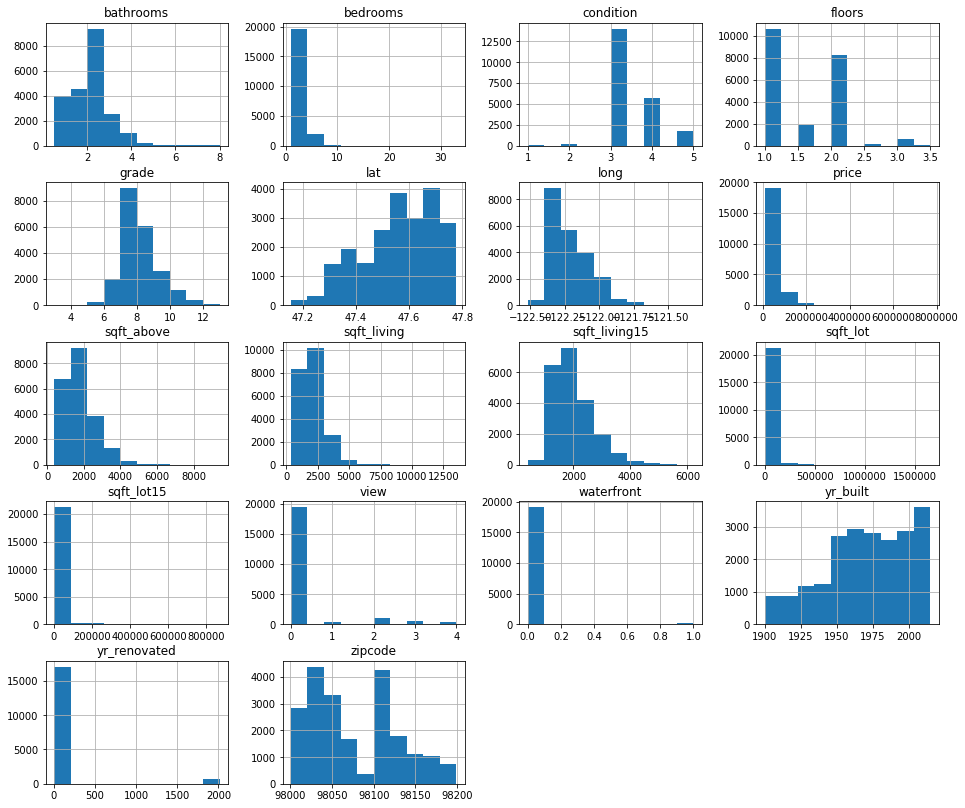

In [39]:
# Create histograms for numerical variables
data_for_hist = data.drop(['id'], axis=1)

data_for_hist.hist(figsize=(16,14));

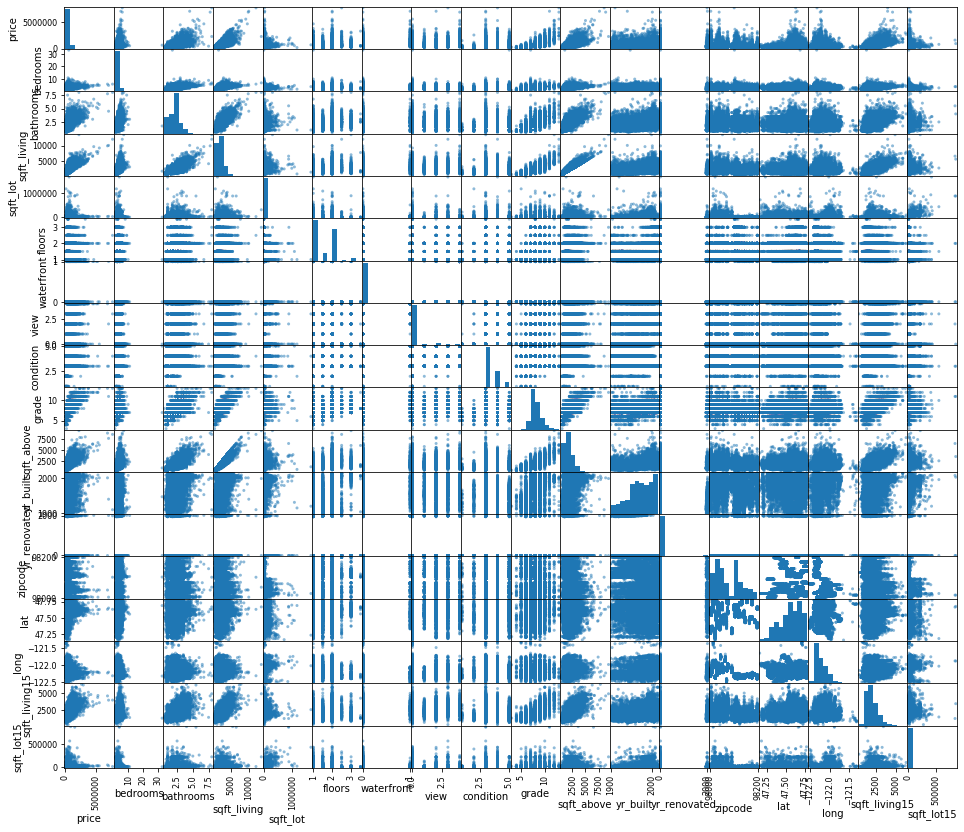

In [94]:
# Create a scatter_matrix to look for categorical variables and linear relationships
pd.plotting.scatter_matrix(data.drop(['id'], axis=1), figsize=[16,14]);

In [40]:
# Check the number of unique values in each column
unique_vals_list = []
for col in data.columns:
    unique_vals_list.append({'column': col, 'unique values': len(data[col].unique())})
pd.DataFrame(unique_vals_list)

,column,unique values
0,id,21420
1,date,372
2,price,3622
3,bedrooms,12
4,bathrooms,29
5,sqft_living,1034
6,sqft_lot,9776
7,floors,6
8,waterfront,3
9,view,6


There are some clearly categorical variables and a few that could be considered continuous or categorical. For this analysis, I will treat `waterfront`, `view`, and `condition` as categorical. I will treat `grade` and `floors` as continuous variables that happen to have very narrow ranges and occur only in whole or half values (e.g., 3, 3.5, etc.).

#### An obvious outlier

There's something fishy going in the `bedrooms` column. `data.describe()` showed us that the maximum value in that column is 33, and in the scatterplots and histograms above, we can see that most values are under 10.

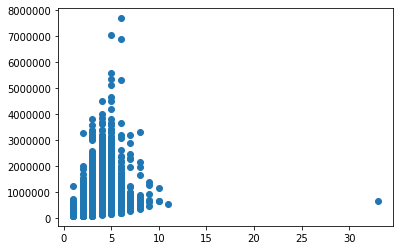

In [133]:
# Use a scatter plot to look for an outlier in 'bedrooms'
plt.scatter(data['bedrooms'], data['price']);

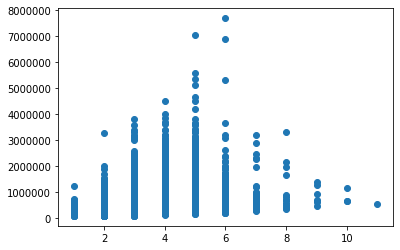

In [131]:
# Compare the distribution of 'bedrooms' v. 'price' without the outlier
bedrooms = data[data['bedrooms'] != 33]
plt.scatter(bedrooms['bedrooms'], bedrooms['price'])
plt.show();

In [132]:
# Inspect the suspicious record
data[data['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


Thirty-three bedrooms seems physically impossible in a house of 1620 square feet. My best guess is that '33' is a typographical error for '3', so in the cleaning stage below I will edit this record.

### Digression demonstrating that 'sqft_living15' and 'sqft_lot15' represent square footage of 15 nearest neighbors

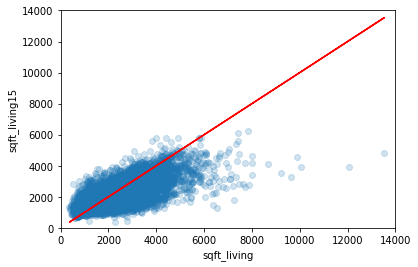

In [156]:
plt.scatter(data['sqft_living'], data['sqft_living15'], alpha=0.2)
plt.plot(data['sqft_living'], data['sqft_living'], color='red')
plt.xlim(0, 14000)
plt.ylim(0, 14000)
plt.xlabel('sqft_living')
plt.ylabel('sqft_living15')
plt.show();

In [154]:
data[data['sqft_living'] == max(data['sqft_living'])]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12764,1225069038,5/5/2014,2280000.0,7,8.0,13540,307752,3.0,0.0,4.0,...,12,9410,4130.0,1999,0.0,98053,47.6675,-121.986,4850,217800


In [151]:
print('Number of houses bigger than sqft_living15: ', 
     len(data[data['sqft_living'] > data['sqft_living15']]))
print('Number of houses smaller than sqft_living15: ',
     len(data[data['sqft_living'] < data['sqft_living15']]))
print('Number of houses equal to sqft_living15: ',
     len(data[data['sqft_living'] == data['sqft_living15']]))

Number of houses bigger than sqft_living15:  9838
Number of houses smaller than sqft_living15:  9196
Number of houses equal to sqft_living15:  2563


If `sqft_living15` represented square footage in 2015, then 46% (9,838/21,597) of houses would have lost square footage between their initial measurement and 2015. It makes much more sense that 46% of properties would be bigger than the average of their 15 nearest neighbors, 43% (9,196/21,597) smaller than that average, and the rest equal to that average square footage.

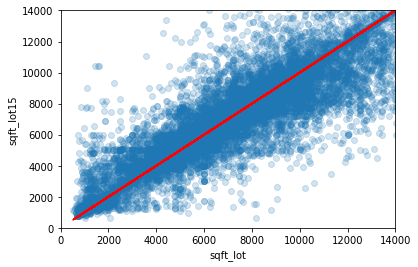

In [157]:
plt.scatter(data['sqft_lot'], data['sqft_lot15'], alpha=0.2)
plt.plot(data['sqft_lot'], data['sqft_lot'], color='red')
plt.xlim(0, 14000)
plt.ylim(0, 14000)
plt.xlabel('sqft_lot')
plt.ylabel('sqft_lot15')
plt.show();

In [153]:
print('Number of lots bigger than sqft_lot15: ', 
     len(data[data['sqft_lot'] > data['sqft_lot15']]))
print('Number of lots smaller than sqft_lot15: ',
     len(data[data['sqft_lot'] < data['sqft_lot15']]))
print('Number of lots equal to sqft_lot15: ',
     len(data[data['sqft_lot'] == data['sqft_lot15']]))

Number of lots bigger than sqft_lot15:  8593
Number of lots smaller than sqft_lot15:  8530
Number of lots equal to sqft_lot15:  4474


### Question 3. Are any of the independent variables strongly correlated with each other?

In [41]:
# Create a boolean correlation matrix to highlight strong correlations
abs(data.corr()) > 0.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


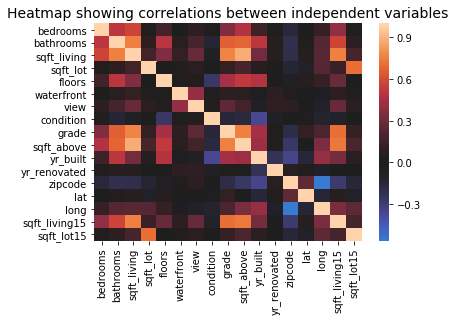

In [25]:
data_for_scatter_matrix = data.drop(['price', 'id'], axis=1)
sns.heatmap(data_for_scatter_matrix.corr(), center=0)
plt.title('Heatmap showing correlations between independent variables', fontsize=14)
plt.show();

We can see from the above correlation matrix and heatmap that there are high correlations (over 0.75) between `sqft_living` and the following independent variables:
- `bathrooms`
- `grade`
- `sqft_above`
- `sqft_living15`

There is also high correlation between `grade` and `sqft_above`.

There is _not_ a high correlation between `price` and any one of the independent variables, so multiple linear regression is a good choice. Whatever is affecting price, it's not one variable, but rather a combination of variables.

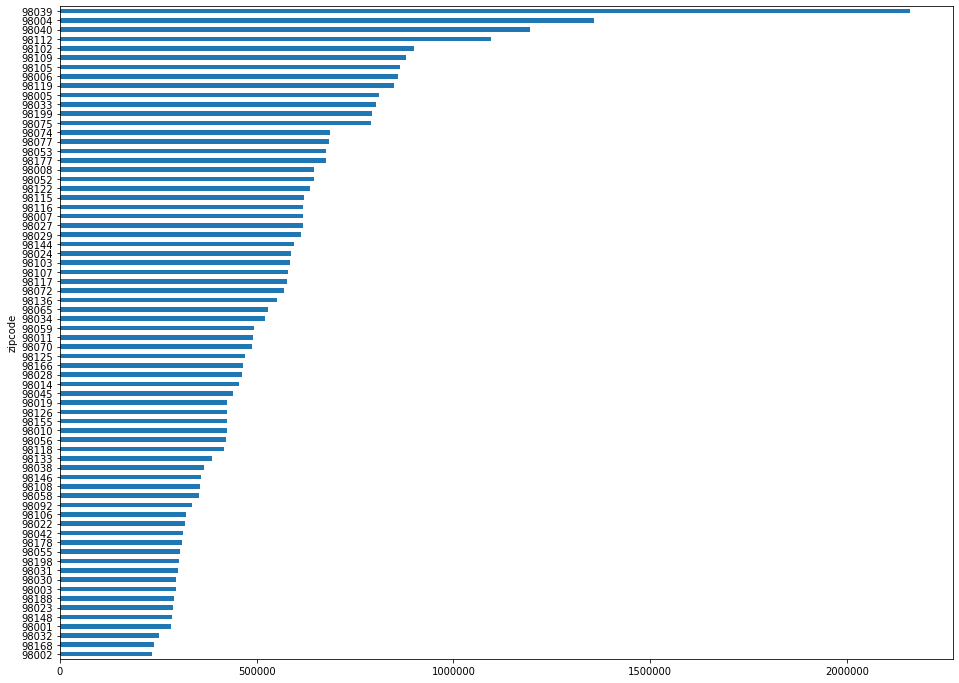

In [173]:
# Reorder zipcodes by price to see if there is a linear relationship there
zips = pd.concat([data['zipcode'], data['price']], axis=1)

zips.groupby('zipcode')['price'].mean().sort_values().plot(kind='barh', figsize=[16,12])

In [219]:
seattle_zip_codes = [98101, 98102, 98103, 98104, 98105, 98106, 98107, 
                     98108, 98109, 98112, 98115, 98116, 98117, 98118, 
                     98119, 98121, 98122, 98125, 98126, 98133, 98134, 
                     98136, 98144, 98146, 98154, 98164, 98174, 98177, 
                     98178, 98195, 98199]
zips['seattle'] = data['zipcode'].isin(seattle_zip_codes)
zips.head()

,zipcode,price,seattle
0,98178,221900.0,True
1,98125,538000.0,True
2,98028,180000.0,False
3,98136,604000.0,True
4,98074,510000.0,False


ValueError: Invalid RGBA argument: True

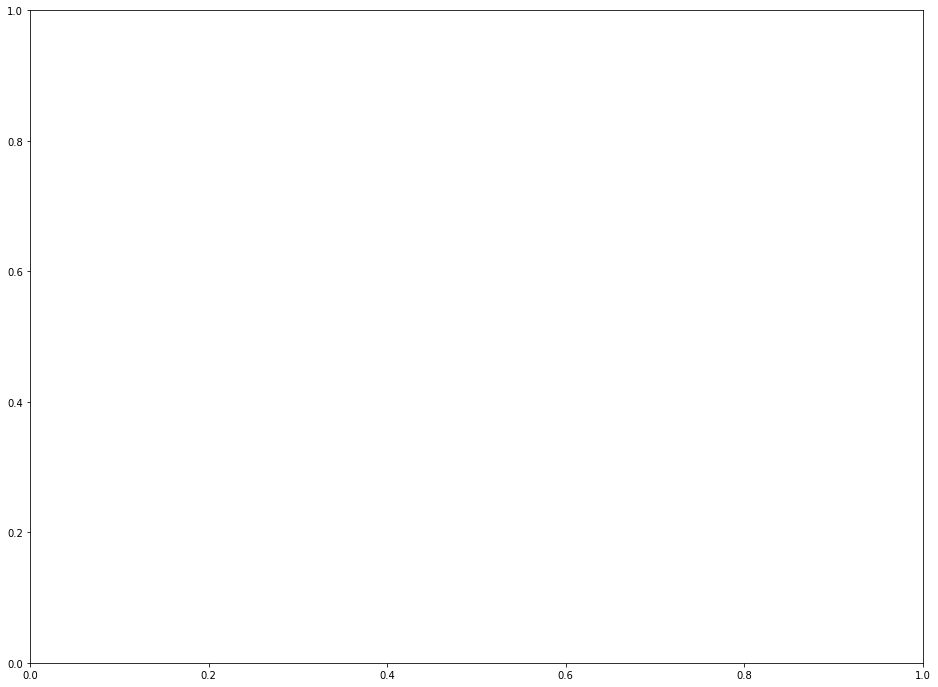

In [222]:
# Trying to reproduce the bar chart but with bars colored by whether the zip is in Seattle
palette = {'True': 'blue', 'False': 'orange'}
zips.groupby('zipcode')['price'].mean().sort_values().plot(kind='barh', c=zips['seattle'], figsize=[16,12])

### Where are the most expensive houses?

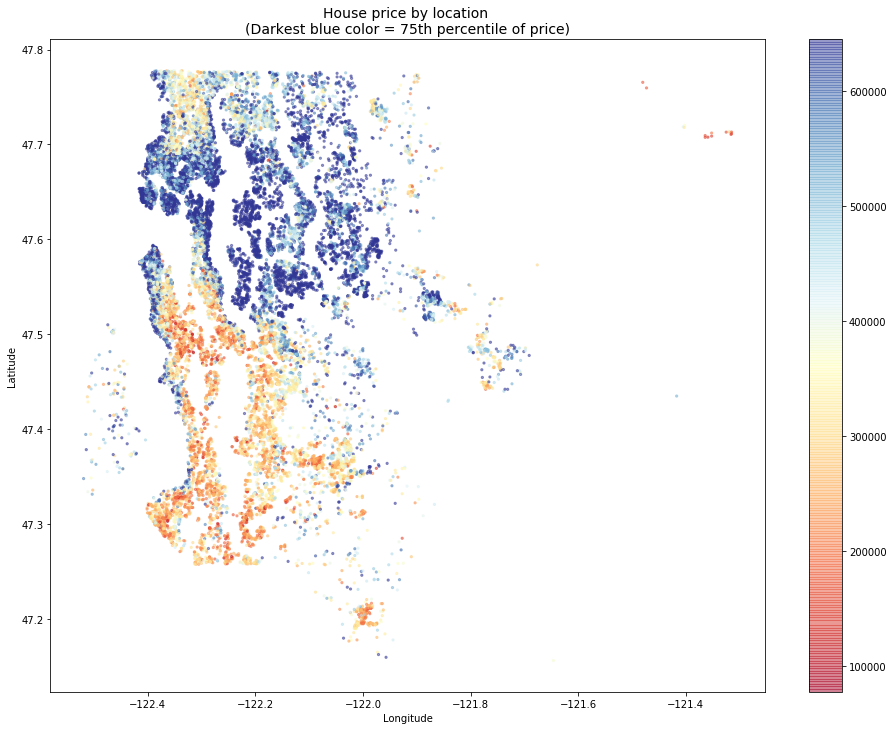

In [200]:
# Visualize price by location
plt.figure(figsize=(16,12))
cmap = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(data['long'], data['lat'], c=data['price'], 
                 vmin=min(data['price']), vmax=np.percentile(data['price'], 75), 
                 alpha=0.5, s=5, cmap=cmap)
plt.colorbar(sc)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House price by location \n(Darkest blue color = 75th percentile of price)', fontsize=14)
plt.show();

### Where are the biggest houses (by square feet of living space)?

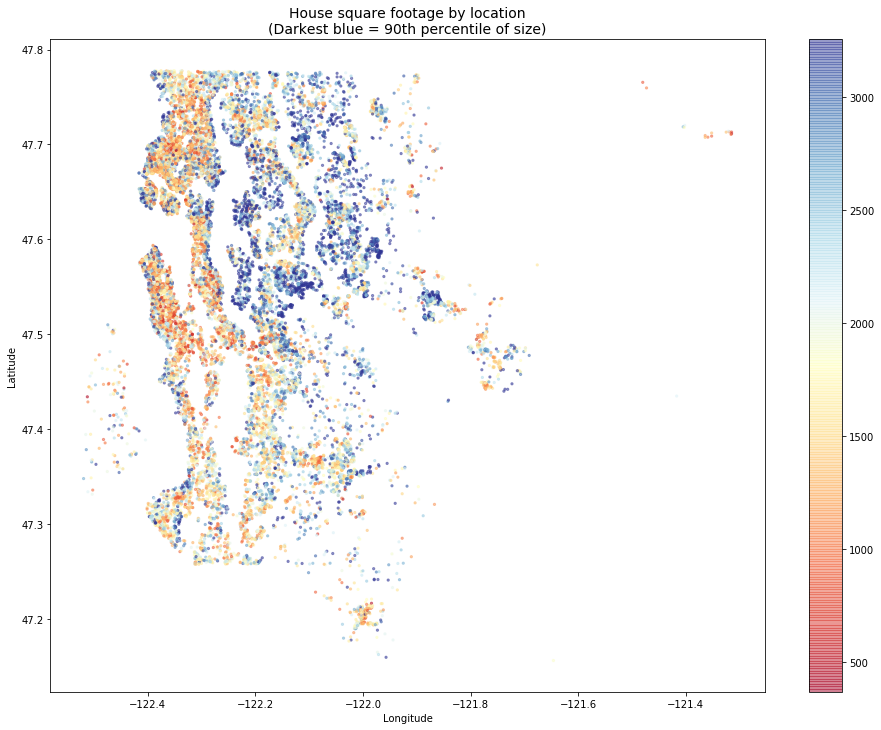

In [205]:
# Visualize square footage (living space) by location
plt.figure(figsize=(16,12))
cmap = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(data['long'], data['lat'], c=data['sqft_living'], 
                 vmin=min(data['sqft_living']), vmax=np.percentile(data['sqft_living'], 90), 
                 alpha=0.5, s=5, cmap=cmap)
plt.colorbar(sc)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House square footage by location\n(Darkest blue = 90th percentile of size)', fontsize=14)
plt.show();

### Where are the biggest lots?

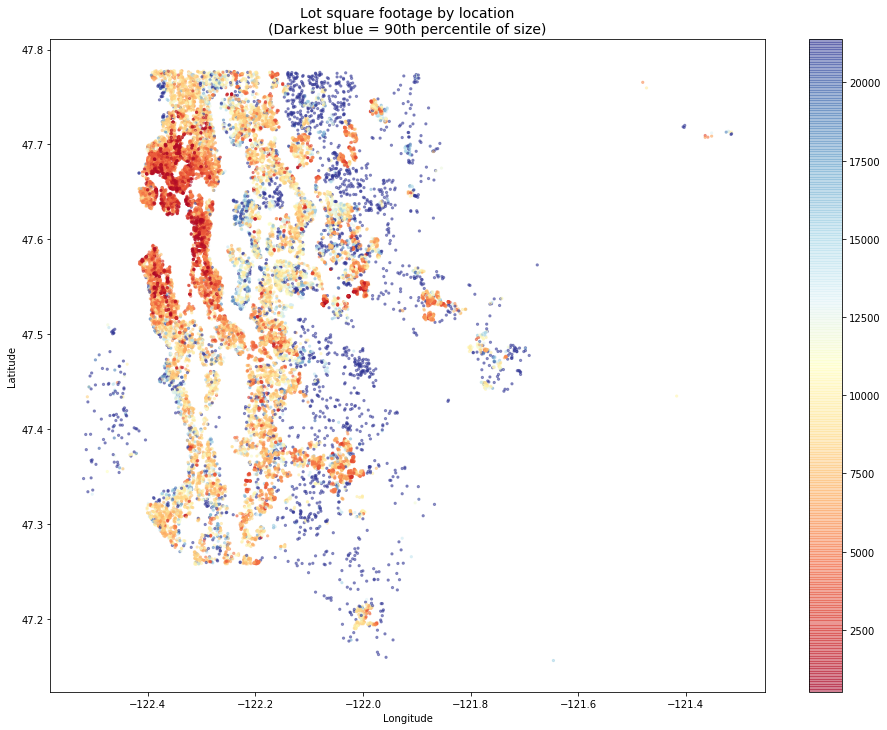

In [206]:
# Visualize size of lot by location
plt.figure(figsize=(16,12))
cmap = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(data['long'], data['lat'], c=data['sqft_lot'], 
                 vmin=min(data['sqft_lot']), vmax=np.percentile(data['sqft_lot'], 90), 
                 alpha=0.5, s=5, cmap=cmap)
plt.colorbar(sc)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Lot square footage by location\n(Darkest blue = 90th percentile of size)', fontsize=14)
plt.show();

### Where are the highest quality houses (by grade)?

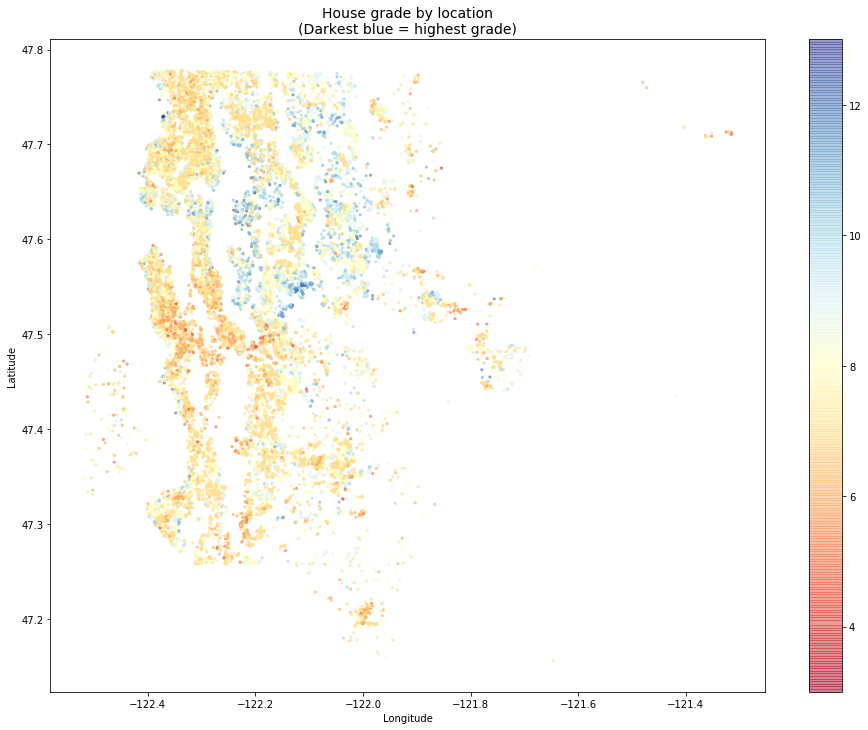

In [209]:
# Visualize grade by location
plt.figure(figsize=(16,12))
cmap = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(data['long'], data['lat'], c=data['grade'], 
                 vmin=min(data['grade']), vmax=max(data['grade']), 
                 alpha=0.5, s=5, cmap=cmap)
plt.colorbar(sc)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House grade by location\n(Darkest blue = highest grade)', fontsize=14)
plt.show();

### Where are the highest quality houses (by condition)?

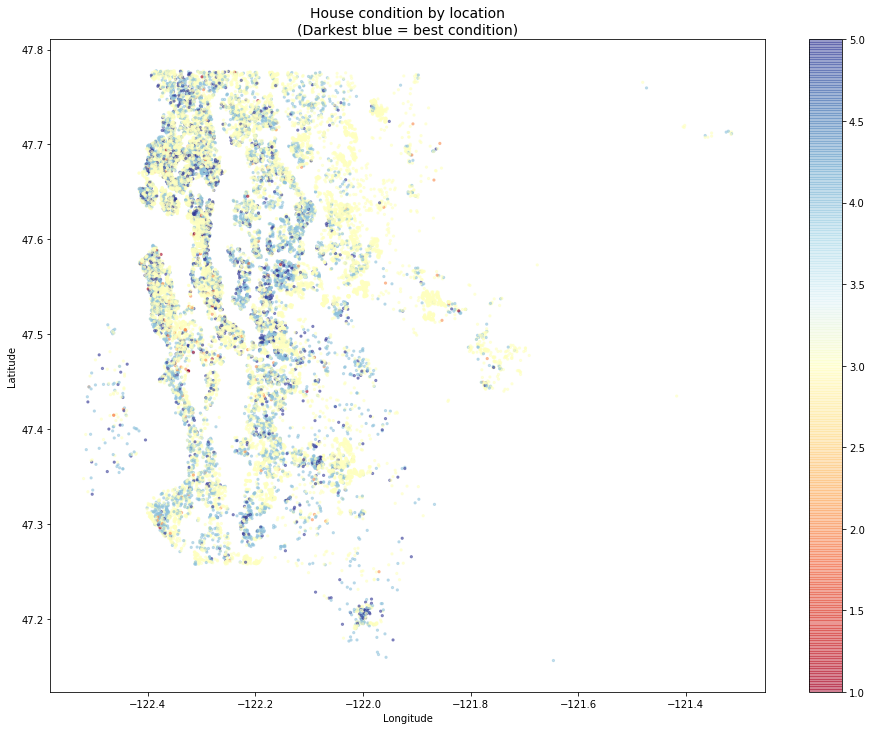

In [212]:
# Visualize condition by location
plt.figure(figsize=(16,12))
cmap = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(data['long'], data['lat'], c=data['condition'], 
                 vmin=min(data['condition']), vmax=max(data['condition']), 
                 alpha=0.5, s=5, cmap=cmap)
plt.colorbar(sc)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House condition by location\n(Darkest blue = best condition)', fontsize=14)
plt.show();

### Visualizing zip code boundaries

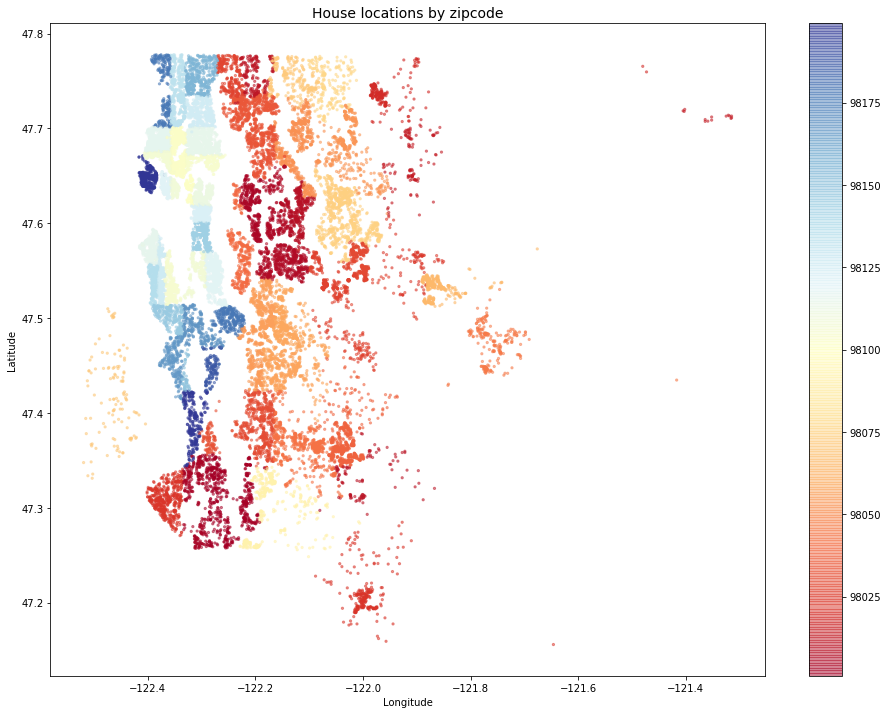

In [227]:
# Visualize zip code boundaries
plt.figure(figsize=(16,12))
cmap = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(data['long'], data['lat'], c=data['zipcode'], 
                 vmin=min(data['zipcode']), vmax=max(data['zipcode']), 
                 alpha=0.5, s=5, cmap=cmap)
plt.colorbar(sc)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House locations by zipcode', fontsize=14)
plt.show();

In [202]:
data_by_zip = data.groupby('zipcode').mean()
data_by_zip.head(20)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
zipcode,,,,,,,,,,,,,,,,,,
98001,4.651274e+09,2.811949e+05,3.393352,2.011773,1903.783934,14967.002770,1.430748,0.000000,0.094708,3.335180,7.296399,1723.756233,1980.867036,28.038732,47.309106,-122.270704,1830.099723,11218.875346
98002,4.850894e+09,2.342840e+05,3.326633,1.839196,1627.743719,7517.633166,1.334171,0.000000,0.010050,3.743719,6.693467,1522.537688,1967.773869,60.212121,47.308780,-122.213357,1479.030151,7585.482412
98003,4.674182e+09,2.941113e+05,3.357143,2.047321,1928.882143,10603.096429,1.310714,0.000000,0.214286,3.371429,7.542857,1663.550000,1976.885714,16.641667,47.315741,-122.310054,1876.196429,9746.178571
98004,4.394237e+09,1.356524e+06,3.854890,2.527603,2909.022082,13104.220820,1.432177,0.003534,0.306962,3.495268,8.687697,2419.842271,1971.470032,213.759542,47.616183,-122.205189,2674.700315,12805.022082
98005,4.961872e+09,8.102897e+05,3.851190,2.424107,2656.803571,19928.785714,1.279762,0.000000,0.095238,3.696429,8.488095,2160.196429,1969.744048,57.985507,47.611532,-122.167268,2567.863095,18367.773810
98006,4.621241e+09,8.599386e+05,3.841365,2.555723,2888.295181,13383.435743,1.459839,0.009132,0.631791,3.658635,8.795181,2300.383534,1978.720884,82.798054,47.558022,-122.146839,2785.612450,12159.959839
98007,4.450672e+09,6.172540e+05,3.815603,2.173759,2182.056738,10662.702128,1.411348,0.000000,0.028369,3.631206,7.964539,1885.673759,1971.070922,51.767241,47.610522,-122.142078,2124.822695,9579.900709
98008,4.594706e+09,6.456282e+05,3.734982,2.088339,2133.445230,10188.448763,1.181979,0.035156,0.477032,3.667845,7.653710,1713.088339,1966.325088,59.139241,47.613312,-122.115834,2021.130742,9494.996466
98010,3.879195e+09,4.236660e+05,3.290000,2.027500,2137.590000,55465.300000,1.480000,0.000000,0.100000,3.530000,7.400000,2000.340000,1979.180000,241.914634,47.333210,-121.999470,2008.760000,47830.270000


## Cleaning

To prepare the data for modeling, the following things need to be done:
- Change the `date` column to datetime and extract year and month to separate columns
- Edit the record with an apparent error in the `bedrooms` column
- Resolve NaNs in the `waterfront`, `view`, and `yr_renovated` columns
- Log-transform `sqft_living`, `sqft_lot`, `sqft_above`, `sqft_living15`, and `sqft_lot15`
- Make dummies for the categorical variables (`waterfront`, `view`, and `condition`) and then drop one column of each from the dataset

In [2]:
# date_clean = pd.to_datetime(data['date'], dayfirst=True)
# date_clean[:10]

0   2014-10-13
1   2014-09-12
2   2015-02-25
3   2014-09-12
4   2015-02-18
5   2014-12-05
6   2014-06-27
7   2015-01-15
8   2015-04-15
9   2015-12-03
Name: date, dtype: datetime64[ns]

In [3]:
# Inspect values in 'sqft_basement'
data['sqft_basement'].value_counts()

# Replace '?' with '0.0'
sqft_basement_clean = data['sqft_basement'].replace('?', '0.0')

# Cast 'sqft_basement_clean' to float
sqft_basement_clean = sqft_basement_clean.astype('float64')
sqft_basement_clean.dtypes

dtype('float64')

In [30]:
# Find out how many values are missing in 'waterfront'
print(data['waterfront'].unique())
print(data['waterfront'].value_counts())

# Fill NaNs with 0.0 because it is by far the more common value
waterfront_clean = data['waterfront'].fillna(0.0).astype('int64')
waterfront_clean.unique()

[nan  0.  1.]
0.0    19075
1.0      146
Name: waterfront, dtype: int64


array([0, 1])

In [31]:
# Find out how many values are missing in 'view'
print(data['view'].unique())
print(data['view'].value_counts())

# Fill NaNs with 0.0 because it is by far the most common value
view_clean = data['view'].fillna(0.0).astype('int64')
view_clean.unique()

[ 0. nan  3.  4.  2.  1.]
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64


array([0, 3, 4, 2, 1])

In [32]:
condition_clean = data['condition'].astype('int64')
condition_clean.unique()

array([3, 5, 4, 1, 2])

In [6]:
# Find out how many values are missing in 'yr_renovated'
print(data['yr_renovated'].unique())
print(data['yr_renovated'].value_counts().head())

# Fill NaNs with 0 because it is by far the most common value
yr_renovated_clean = data['yr_renovated'].fillna(0)
yr_renovated_clean.unique()

[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]
0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
Name: yr_renovated, dtype: int64


array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [7]:
# Log-transform all the square-footage variables
sqft_living_log = np.log(data['sqft_living'])
sqft_lot_log = np.log(data['sqft_lot'])
sqft_above_log = np.log(data['sqft_above'])
sqft_basement_log = np.log(sqft_basement_clean)
sqft_living15_log = np.log(data['sqft_living15'])
sqft_lot15_log = np.log(data['sqft_lot15'])

/Users/jennykreiger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


In [8]:
# Replace -inf values with 0 and convert back to float
sqft_basement_log = sqft_basement_log.astype('str')
sqft_basement_log = sqft_basement_log.replace('-inf', '0.0')
sqft_basement_log = sqft_basement_log.astype('float64')

In [33]:
# Get dummies for the categorical variables
waterfront_dummies = pd.get_dummies(waterfront_clean, prefix='waterfront')
view_dummies = pd.get_dummies(view_clean, prefix='view')
condition_dummies = pd.get_dummies(condition_clean, prefix='condition')

In [36]:
# Drop old versions of cleaned columns from dataset
# removed 'date' from drop
data_dropped = data.drop(['waterfront', 'view', 'yr_renovated',
          'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15',
          'sqft_lot15', 'condition'], axis=1)

# Concatenate remaining columns of original dataset and new columns
# removed date_clean from concat
data_clean = pd.concat([data_dropped, yr_renovated_clean, sqft_living_log, 
                       sqft_lot_log, sqft_above_log, sqft_basement_log, 
                       sqft_living15_log, sqft_lot15_log, waterfront_dummies, 
                       view_dummies, condition_dummies], axis=1)

# Drop one dummy column of each categorical variable
data_clean = data_clean.drop(['waterfront_0', 'view_0', 'condition_1'], axis=1)

In [37]:
# Check that data types and missing values are resolved
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 27 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
floors           21597 non-null float64
grade            21597 non-null int64
yr_built         21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
yr_renovated     21597 non-null float64
sqft_living      21597 non-null float64
sqft_lot         21597 non-null float64
sqft_above       21597 non-null float64
sqft_basement    21597 non-null float64
sqft_living15    21597 non-null float64
sqft_lot15       21597 non-null float64
waterfront_1     21597 non-null uint8
view_1           21597 non-null uint8
view_2           21597 non-null uint8
view_3           21597 non-null uint8
view_4           21597 non-nul

In [38]:
data_clean.head()

,id,date,price,bedrooms,bathrooms,floors,grade,yr_built,zipcode,lat,...,sqft_lot15,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5
0,7129300520,10/13/2014,221900.0,3,1.00,1.0,7,1955,98178,47.5112,...,8.639411,0,0,0,0,0,0,1,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2.0,7,1951,98125,47.7210,...,8.941022,0,0,0,0,0,0,1,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,1.0,6,1933,98028,47.7379,...,8.994917,0,0,0,0,0,0,1,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1.0,7,1965,98136,47.5208,...,8.517193,0,0,0,0,0,0,0,0,1
4,1954400510,2/18/2015,510000.0,3,2.00,1.0,8,1987,98074,47.6168,...,8.923058,0,0,0,0,0,0,1,0,0


In [39]:
data_clean['date'].head(20)

0     10/13/2014
1      12/9/2014
2      2/25/2015
3      12/9/2014
4      2/18/2015
5      5/12/2014
6      6/27/2014
7      1/15/2015
8      4/15/2015
9      3/12/2015
10      4/3/2015
11     5/27/2014
12     5/28/2014
13     10/7/2014
14     3/12/2015
15     1/24/2015
16     7/31/2014
17     5/29/2014
18     12/5/2014
19     4/24/2015
Name: date, dtype: object

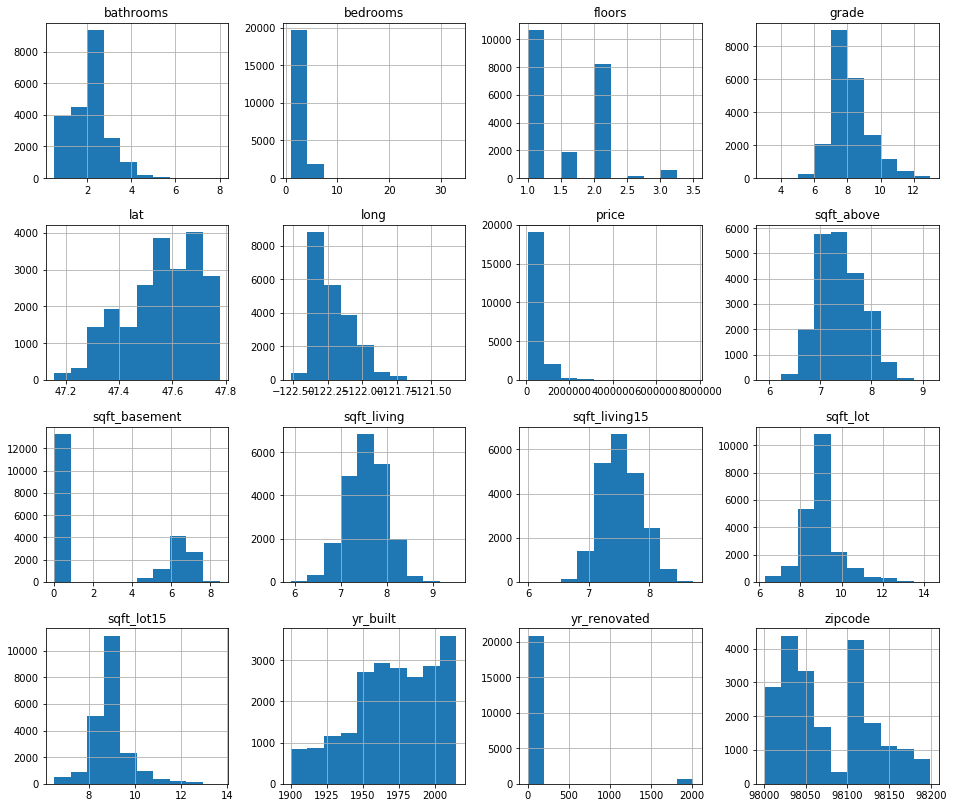

In [16]:
# Rerun the visualizations to check for any new issues
data_clean_for_hist = data_clean.drop(['id', 'condition_2', 'condition_3',
                                      'condition_4', 'condition_5', 'view_1.0', 'view_2.0',
                                      'view_3.0', 'view_4.0', 'waterfront_0.0'], axis=1)

data_clean_for_hist.hist(figsize=(16,14));

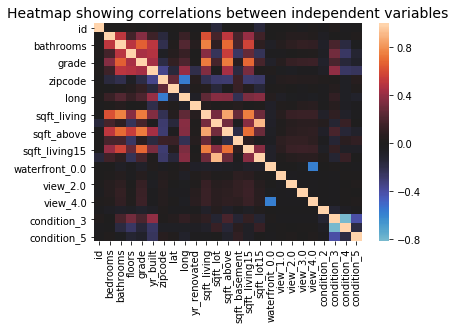

In [17]:
data_clean_for_corr = data_clean.drop(['price'], axis=1)
sns.heatmap(data_clean_for_corr.corr(), center=0)
plt.title('Heatmap showing correlations between independent variables', fontsize=14)
plt.show();

In [18]:
abs(data_clean_for_hist.corr()) > 0.75

,price,bedrooms,bathrooms,floors,grade,yr_built,zipcode,lat,long,yr_renovated,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
floors,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
zipcode,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
lat,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
long,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


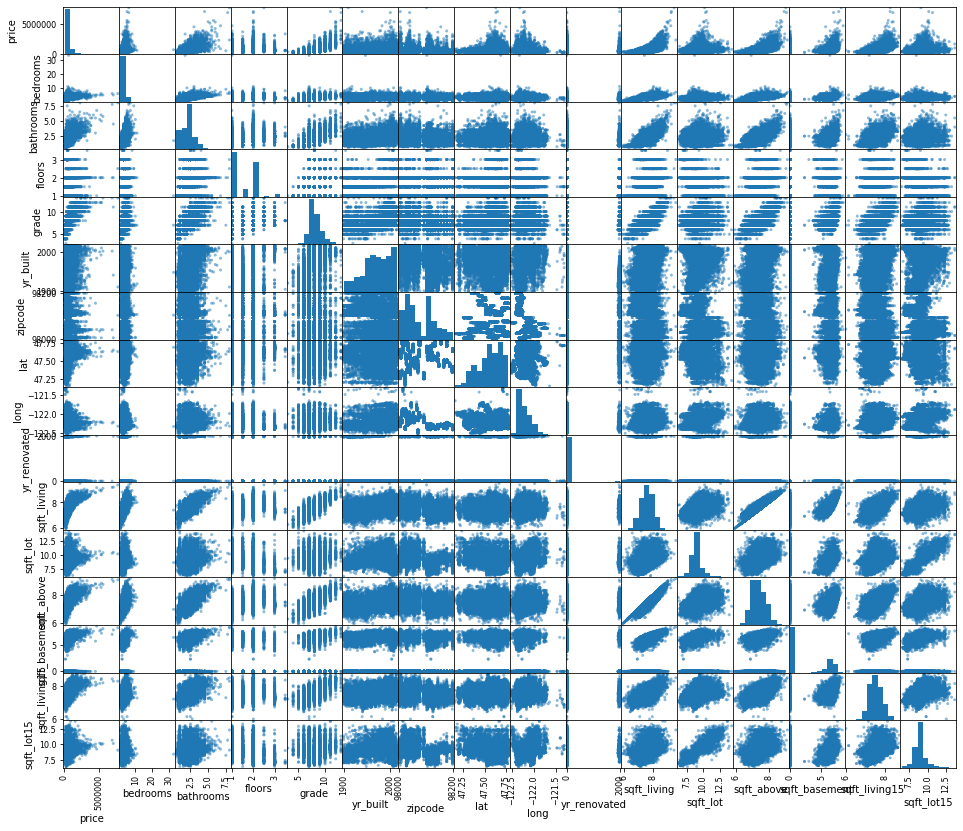

In [33]:
pd.plotting.scatter_matrix(data_clean_for_hist, figsize=[16,14]);

In [40]:
# Split the cleaned data into features and target
# drop date, too
data_features = data_clean.drop(['price', 'date'], axis=1)
data_target = data_clean['price']

print(data_features.head())
print(data_target.head())

           id  bedrooms  bathrooms  floors  grade  yr_built  zipcode      lat  \
0  7129300520         3       1.00     1.0      7      1955    98178  47.5112   
1  6414100192         3       2.25     2.0      7      1951    98125  47.7210   
2  5631500400         2       1.00     1.0      6      1933    98028  47.7379   
3  2487200875         4       3.00     1.0      7      1965    98136  47.5208   
4  1954400510         3       2.00     1.0      8      1987    98074  47.6168   

      long  yr_renovated  ...  sqft_lot15  waterfront_1  view_1  view_2  \
0 -122.257           0.0  ...    8.639411             0       0       0   
1 -122.319        1991.0  ...    8.941022             0       0       0   
2 -122.233           0.0  ...    8.994917             0       0       0   
3 -122.393           0.0  ...    8.517193             0       0       0   
4 -122.045           0.0  ...    8.923058             0       0       0   

   view_3  view_4  condition_2  condition_3  condition_4  cond

## Modeling

Here I begin an interative process of modeling the data using multiple linear regression, analyzing the model coefficients and measures of goodness of fit, and then tuning the data and the model to improve performance.

First up: a straightforward multiple linear regression using the entire `data_features` dataset.

In [20]:
# Import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [24]:
# Import sklearn
from sklearn.linear_model import LinearRegression

In [67]:
# Initialize and run the model using statsmodels
features_sum = '+'.join(data_features.columns)
formula = 'price' + '~' + features_sum

model = ols(formula=formula, data=data_clean).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     1729.
Date:                Mon, 26 Aug 2019   Prob (F-statistic):               0.00
Time:                        10:43:02   Log-Likelihood:            -2.9551e+05
No. Observations:               21597   AIC:                         5.911e+05
Df Residuals:                   21571   BIC:                         5.913e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.308e+07   3.19e+06      4.107      0.000    6.84e+06    1.93e+07
id            -2.167e-06   5.12e-07     -4.231      0.000   -3.17e-06   -1.16e-06
bedrooms      -1.528e+04   2080.227     -7.348      0.000   -1.94e+04   -1.12e+04
bathrooms      8.611e+04   3425.310     25.141      0.000    7.94e+04    9.28e+04
floors        -1.135e+04   4169.487     -2.722      0.007   -1.95e+04   -3175.235
grade          1.353e+05   2203.292     61.414      0.000    1.31e+05     1.4e+05
yr_built      -3148.0377     76.349    -41.232      0.000   -3297.687   -2998.388
zipcode        -549.7746     34.997    -15.709      0.000    -618.371    -481.178
lat            5.836e+05   1.14e+04     51.188      0.000    5.61e+05    6.06e+05
long          -1.395e+05   1.42e+04     -9.839      0.000   -1.67e+05   -1.12e+05
yr_renovated     20.5612      4.207      4.888      0.000      12.316      28.807
sqft_living    -9.35e+04   1.64e+04     -5.685      0.000   -1.26e+05   -6.13e+04
sqft_lot       8872.8785   4239.685      2.093      0.036     562.783    1.72e+04
sqft_above      2.55e+05   1.61e+04     15.872      0.000    2.24e+05    2.87e+05
sqft_basement  1.306e+04   1079.641     12.097      0.000    1.09e+04    1.52e+04
sqft_living15  6.531e+04   7489.092      8.721      0.000    5.06e+04       8e+04
sqft_lot15    -1.835e+04   4589.878     -3.998      0.000   -2.73e+04   -9351.865
waterfront_1   5.746e+05   2.15e+04     26.694      0.000    5.32e+05    6.17e+05
view_1         1.254e+05    1.2e+04     10.494      0.000    1.02e+05    1.49e+05
view_2         8.481e+04   7250.805     11.696      0.000    7.06e+04     9.9e+04
view_3         1.678e+05   9882.542     16.981      0.000    1.48e+05    1.87e+05
view_4         3.443e+05   1.49e+04     23.061      0.000    3.15e+05    3.74e+05
condition_2    1.387e+04   4.27e+04      0.325      0.745   -6.98e+04    9.76e+04
condition_3   -1.821e+04   3.96e+04     -0.459      0.646   -9.59e+04    5.95e+04
condition_4    5867.5503   3.96e+04      0.148      0.882   -7.18e+04    8.36e+04
condition_5    4.642e+04   3.99e+04      1.164      0.245   -3.18e+04    1.25e+05
==============================================================================
Omnibus:                    21309.053   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3634775.466
Skew:                           4.412   Prob(JB):                         0.00
Kurtosis:                      65.939   Cond. No.                     1.19e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+13. This might indicate that there are
strong multicollinearity or other numerical prob

In [66]:
# Initialize and run the regression model using sklearn
linreg = LinearRegression()
linreg.fit(data_features, data_target)

coefs_list = list(zip(data_features.columns, linreg.coef_))
coefs_df = []
for index, coef in enumerate(coefs_list):
    coefs_df.append({'Feature': coef[0], 'coefficient': coef[1]})
coefs_df = pd.DataFrame(coefs_df)
display(coefs_df)
print('intercept: ', linreg.intercept_)

,Feature,coefficient
0,id,-0.000002
1,bedrooms,-15284.885024
2,bathrooms,86114.943235
3,floors,-11347.693059
4,grade,135313.199869
5,yr_built,-3148.038432
6,zipcode,-549.774863
7,lat,583618.804234
8,long,-139523.400738
9,yr_renovated,20.561136


intercept:  13083620.234311577


<Figure size 432x288 with 0 Axes>

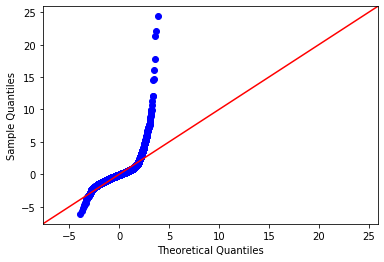

In [69]:
# Use a Q-Q plot to check distribution of residuals
from scipy import stats

plt.figure()
sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True);

The first model explains 66.7% of the variability in price, but the p-values on some of the coefficients are too high (>0.05), and the residuals are not normally distributed. 

For the second iteration, I'll first use feature selection to choose the best features to retain and drop the rest.

In [57]:
# Import RFE 
from sklearn.feature_selection import RFE

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=5)
selector = selector.fit(data_features, data_target)

In [60]:
# Inspect the results
selector.support_

selector_list = list(zip(data_features.columns, selector.support_))
selector_list

[('id', False),
 ('bedrooms', False),
 ('bathrooms', False),
 ('floors', False),
 ('grade', False),
 ('yr_built', False),
 ('zipcode', False),
 ('lat', True),
 ('long', False),
 ('yr_renovated', False),
 ('sqft_living', True),
 ('sqft_lot', False),
 ('sqft_above', False),
 ('sqft_basement', False),
 ('sqft_living15', False),
 ('sqft_lot15', False),
 ('waterfront_1', True),
 ('view_1', False),
 ('view_2', False),
 ('view_3', True),
 ('view_4', True),
 ('condition_2', False),
 ('condition_3', False),
 ('condition_4', False),
 ('condition_5', False)]

In [59]:
# Inspect the results
selector.ranking_

array([21, 17, 10, 11,  4, 18, 19,  1,  2, 20,  1, 13,  9, 16,  7, 12,  1,
        3,  5,  1,  1, 15,  8, 14,  6])

In [61]:
# Inspect the results
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[758606.23050544 480648.21796396 603297.47817298 256620.68894356
 458609.16467   ]
-39185172.65259743
